## Classifieur d'auteurs Naive Bayes et SVM

Données utilisées:
http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Video_Games.json.gz

### Import

In [1]:
from classifieur import *

### Data

In [ ]:
data = getDF('reviews_Amazon_Instant_Video.json.gz')
# pour appliquer le classsifieur sur d'autres données, il faut que les données soient dans un dataframe avec une colonne 
#'reviewerID' et une autre colonne 'reviewText'

### Paramètres

In [ ]:
nb_authors = 7   # nb d'auteurs qu'on souhaite classifier
nb_reviews = 70   # nb de reviews par auteurs
taux_train = 0.8
ng = False   # True si on veut ngram de lettres
nb_gram = 1   # nb_gram de lettres
st = False   # True si on veut stem les données
punct = False   # True si on veut enlever la ponctuation
stop = None   # 'english' si on veut enlever les stopwords et qu'on a du texte en anglais, None sinon
spe_char = False   # enleve caractères spécaiux (y compris la ponctuation)

### Classification

precision NB : 0.7040778475371097
rappel NB : 0.7285714285714284
precision SVM : 0.9584058495192949
rappel SVM : 0.9530612244897959


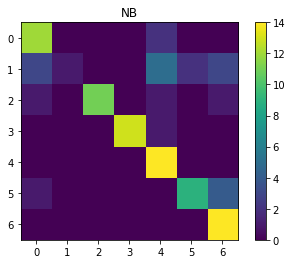

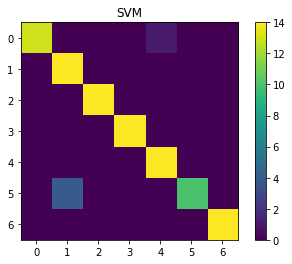

In [5]:
# préparation des données et labels
df, y_data = recup_donnees(nb_authors, nb_reviews, data)

# tf idf des reviews
count_vect, df = preparation(df, stem=st, punctuation=punct, ngram=ng, n=nb_gram, stop_words=stop, special_char=spe_char)
counts = count_vect.fit_transform(df['reviewText'])

# Naive Bayes et SVM
precisionNB, rappelNB = Naive_Bayes_Classifier(count_vect, df, y_data, nb_test, taux_train, nb_authors, nb_reviews)
precisionSVM, rappelSVM = SVM_Classifier(count_vect, df, y_data, nb_test, taux_train, nb_authors, nb_reviews)

print("precision NB : {}".format(precisionNB))
print("rappel NB : {}".format(rappelNB))
print("precision SVM : {}".format(precisionSVM))
print("rappel SVM : {}".format(rappelSVM))

plt.figure()
plt.title("NB")
plt.imshow(confusion_matrix(y_test, predictedNB))
plt.colorbar()
plt.show()

plt.figure()
plt.title("SVM")
plt.imshow(confusion_matrix(y_test, predictedSVM))
plt.colorbar()
plt.show()

### Résultats avec différents types de pré-processing

**sac de mots, sans processing**\
precision NB : 0.8787265191931268\
rappel NB : 0.846938775510204\
precision SVM : 0.9562006908026367\
rappel SVM : 0.9489795918367347

**sac de mots en enlevant les stopwords**\
precision NB : 0.8829212454212454\
rappel NB : 0.863265306122449\
precision SVM : 0.950272776513378\
rappel SVM : 0.9428571428571428

**sac de mots avec stemming**\
precision NB : 0.8862360957142027\
rappel NB : 0.8612244897959183\
precision SVM : 0.9589579164999333\
rappel SVM : 0.9530612244897959

**bigrammes de lettres, sans processing**\
precision NB : 0.8525469050496453\
rappel NB : 0.7918367346938776\
precision SVM : 0.8942279489393599\
rappel SVM : 0.8857142857142858

**1-grammes de lettres, sans processing**\
precision NB : 0.7353625966498101\
rappel NB : 0.6061224489795918\
precision SVM : 0.6729946713386099\
rappel SVM : 0.5612244897959183